In [839]:
# Dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colormaps as cmaps
from matplotlib.colors import ListedColormap as lcmap
from matplotlib.colors import Normalize as norm
from matplotlib.colors import LogNorm as logn
import matplotlib.animation as animation

In [840]:
# global variable for year
yr = 2013
# month list for year
dt = [f'{str(x.date())}'[0:7] for x in pd.date_range(str(yr)+"-01-01", str(yr)+"-12-31", freq="ME")]
# set custom colomap
afmhot = cmaps['afmhot']
afmhot2 = lcmap(afmhot(np.linspace(0.1, 0.7, 256)))

In [845]:
# Load ca boundary/bounding box/grid shape file
ca_bd = gpd.read_file('../outputs/geojson/ca_boundary.geojson')
ca_bbox = gpd.read_file('../outputs/geojson/ca_bbox.geojson')
ca_gdf = gpd.read_file('../outputs/geojson/ca_grid.geojson')

In [842]:
# Read NASA FIRMS fire data for year
fire_df = pd.read_csv(f'../outputs/nasa-firms/{yr}.csv')[['acq_date','latitude','longitude','frp']]
fire_df.insert(1,'cnt',1)
fire_gdf = gpd.GeoDataFrame(fire_df[['acq_date','frp','cnt']], geometry = gpd.points_from_xy(fire_df.longitude,fire_df.latitude), crs=4326)
fire_gdf.tail(1)

,acq_date,frp,cnt,geometry
49459,2013-12-31,7.42,1,POINT (-120.70424 41.49223)


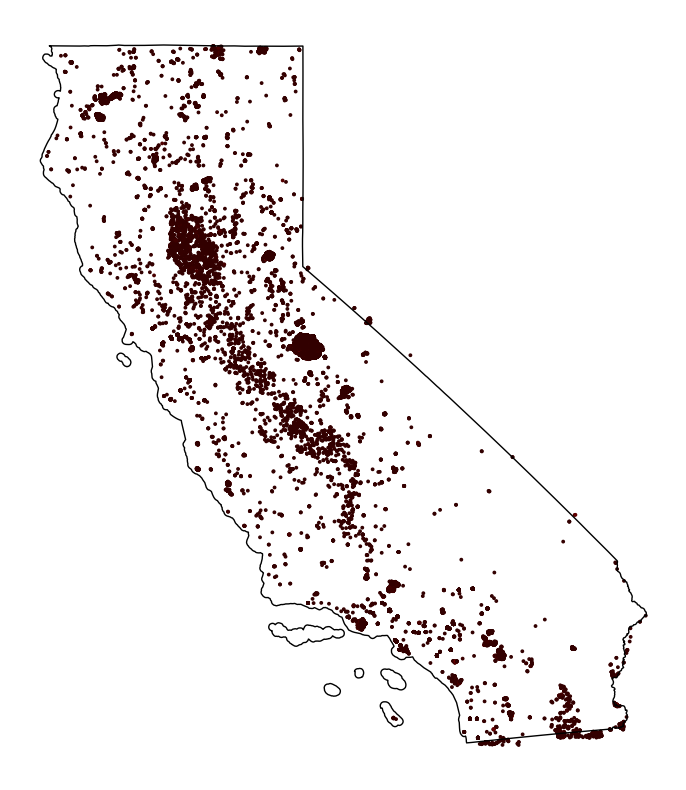

In [850]:
fire_grid_gdf = gpd.sjoin(fire_gdf,ca_gdf, how='left', predicate='within').dropna()
ax = fire_grid_gdf.plot(markersize=3, figsize=(11,10), column='frp', cmap=afmhot2)
ca_bd.to_crs(crs=4326).plot(ax =ax, color='none', edgecolor='black')
ax.axis('off')
plt.show()

In [856]:
dissolve = fire_grid_gdf.dissolve(by='index_right', aggfunc='sum')
dissolve

,geometry,acq_date,frp,cnt
index_right,,,,
11.0,"MULTIPOINT (-124.36935 40.50146, -124.36501 40...",2013-11-222013-11-222013-11-232013-11-23,18.17,4
20.0,"MULTIPOINT (-124.29853 40.31960, -124.29508 40...",2013-10-072013-10-07,12.39,2
24.0,POINT (-124.20826 40.74135),2013-08-30,0.31,1
43.0,POINT (-124.18844 40.78083),2013-08-19,9.88,1
54.0,POINT (-124.12991 41.86336),2013-10-10,8.35,1
...,...,...,...,...
4536.0,"MULTIPOINT (-114.47534 33.74973, -114.46959 33...",2013-03-042013-03-042013-03-042013-03-042013-0...,82.24,5
4537.0,"MULTIPOINT (-114.42065 33.90620, -114.40452 33...",2013-02-252013-06-26,33.73,2
4538.0,POINT (-114.40740 34.08529),2013-05-05,2.11,1


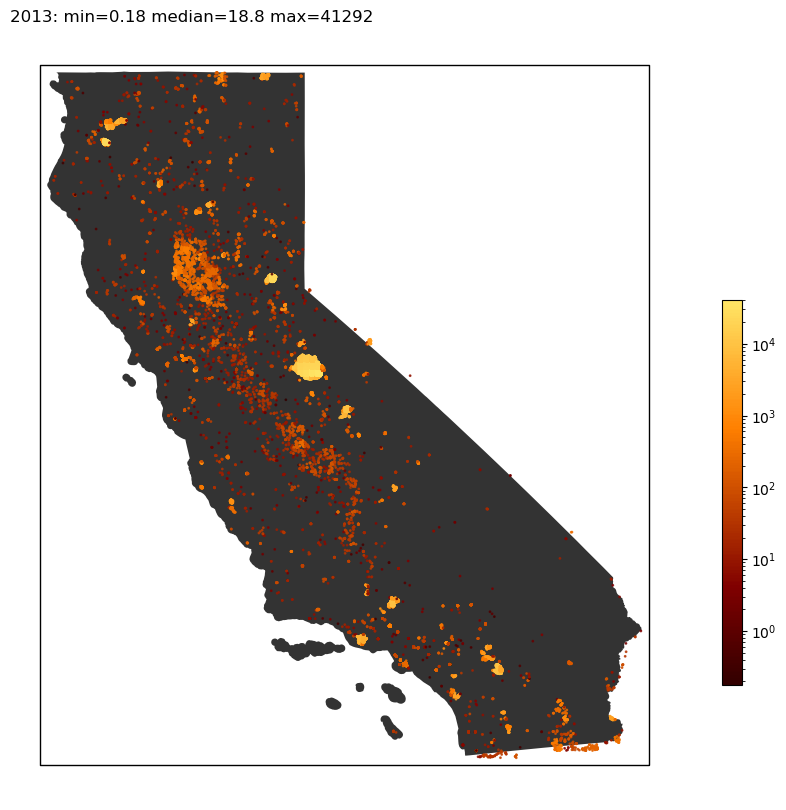

In [855]:
v1 = [dissolve.frp.values.min(),dissolve.frp.values.max()]
n1 = logn(vmin=v1[0], vmax=v1[1])
ax = dissolve.plot(figsize=(11,10), column='frp', cmap=afmhot2, alpha=0.8, markersize=1, 
                  vmin=v1[0], vmax=v1[1], norm=n1, zorder=2)
ax.axis('off')
ca_bd.to_crs(crs=4326).plot(ax=ax, color='#333', zorder=1) # Plot state boundary
ca_bbox.to_crs(crs=4326).plot(ax=ax, color='none', zorder=0) # Plot state bbbox
plt.colorbar(cm.ScalarMappable(norm=n1, cmap=afmhot2), ax=ax,
             location='right', anchor=(0, 0.3), shrink=0.5) # Configure colorbar
plt.title(f'{yr}: min={v1[0]:.{2}f} median={np.median(dissolve.frp.values):.{1}f} max={v1[1]:.{0}f}', loc='left')
ax.axis('off')
# plt.savefig(f'../outputs/nasa-firms/images/frp_{yr}.png')
plt.show()

In [810]:
ca_gdf.loc[dissolve.index, 'cnt'] = df.to_csv(f'../outputs/geojson/ca_fire_all.csv')

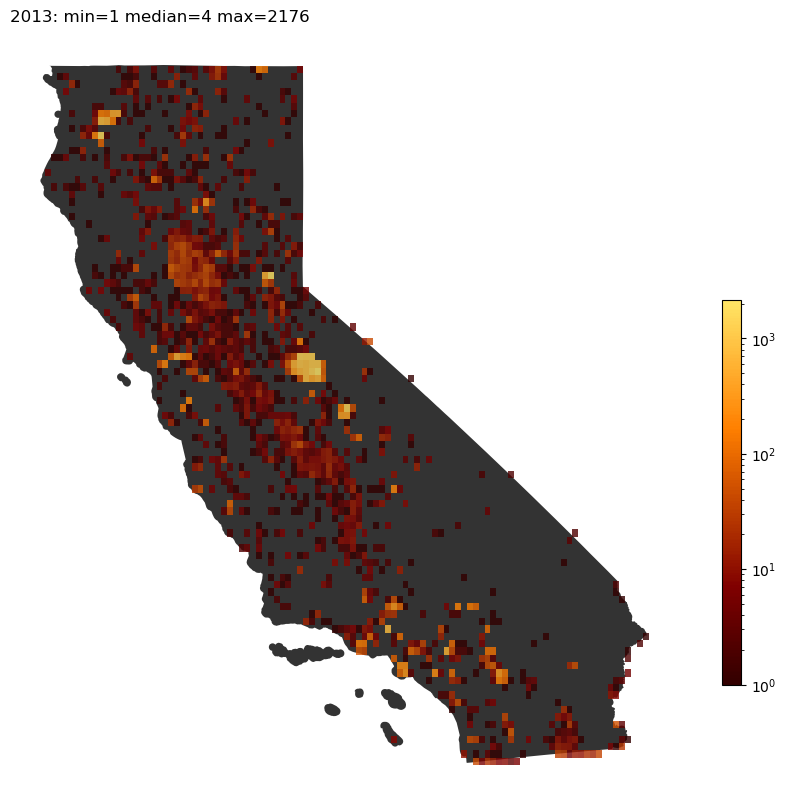

In [811]:
v2 = [dissolve.cnt.values.min(),dissolve.cnt.values.max()]
n2 = logn(vmin=v2[0], vmax=v2[1])
ax2 = ca_gdf.plot(figsize=(11,10), column='cnt', cmap=afmhot2, alpha=0.8, markersize=1, 
                  vmin=v2[0], vmax=v2[1], norm=n2, zorder=2)
ax2.axis('off')
ca = ca_bd.to_crs(crs=4326).plot(ax=ax2, color='#333', zorder=1) # Plot state boundary
plt.colorbar(cm.ScalarMappable(norm=n2, cmap=afmhot2), ax=ax2,
             location='right', anchor=(0, 0.3), shrink=0.5) # Configure colorbar
plt.title(f'{yr}: min={v2[0]} median={np.median(dissolve2.cnt.values):.{0}f} max={v2[1]}', loc='left')
# ax2.axis('off')
plt.savefig(f'../outputs/nasa-firms/images/cnt_{yr}.png')
plt.show()

In [792]:
# Set cmap scale
n1 = logn(vmin=0.08, vmax=round(v1[1]+500,-3))
if v1[1]>35000: n1 = logn(vmin=0.08, vmax=round(v1[1]+5000,-4))
n2 = logn(vmin=1, vmax=round(v2[1]+50,-2))

In [793]:
# variables to store
ca_df_dict = {'frp':pd.DataFrame(columns=dt), 'cnt':pd.DataFrame(columns=dt)}
ca_gdf_dict = {}
# Loop through months and output fire plots
for d in dt:
    # Read CA grid file to get gridded shapes
    ca_gdf = gpd.read_file('../outputs/geojson/ca_grid.geojson')
    # Group Fire by month
    mo_gdf = fire_gdf.loc[fire_df['acq_date'].str[0:7] == d][['frp','cnt','geometry']]
    # Sjoin to isolate fire within CA grid
    mo_grid_gdf = gpd.sjoin(mo_gdf,ca_gdf, how='left', predicate='within')
    # Dissolve on sum of values
    dissolve = mo_grid_gdf.dissolve(by='index_right', aggfunc='sum')
    # Assign values from dissolve
    ca_gdf.loc[dissolve.index, 'frp'] = dissolve.frp.values
    ca_gdf.loc[dissolve.index, 'cnt'] = dissolve.cnt.values
    ca_gdf.loc[dissolve.index, 'frp/cnt'] = dissolve.frp.values/dissolve.cnt.values
    # Store ca geodataframe to dict
    ca_gdf_dict[d] = ca_gdf
    # Store statistical information
    ca_df_dict['frp'][d] = pd.Series(dissolve.frp.values)
    ca_df_dict['cnt'][d] = pd.Series(dissolve.cnt.values)
    st1 = [f'{dissolve.frp.values.min():.{2}f}',
           f'{np.median(dissolve.frp.values):.{1}f}',
           f'{dissolve.frp.values.max():.{0}f}']
    st_cnt_df[d] = pd.Series(dissolve.cnt.values)
    st2 = [f'{dissolve.cnt.values.min()}',
           f'{np.median(dissolve.cnt.values):.{0}f}',
           f'{dissolve.cnt.values.max():.{0}f}']

In [ ]:
# Create Plots
for d in dt:
    for c in ['frp','cnt','frp/cnt']
        # Plot ca cells
        ax = ca_gdf_dict[d].plot(figsize=(11,10), column=c, cmap=afmhot2, alpha=0.8,
                                 markersize=1, vmin=0.1, vmax=12000, norm=n1, zorder=2)
        ax.axis('off')
        ca = ca_bd.to_crs(crs=4326).plot(ax=ax, color='#333', zorder=1) # Plot state boundary
        plt.colorbar(cm.ScalarMappable(norm=n1, cmap=afmhot2), ax=ax, 
                     location='right', anchor=(0, 0.3), shrink=0.5) # Configure colorbar
        v = ca_df_dict[c][d]
        plt.title(f'{d}: min={v.min():.{2}f} median={np.median(v):.{1}f} max={v.max():.{0}f}', loc='left')
        plt.savefig(f'../outputs/nasa-firms/images/{c}/{c}_{d}.png')
        plt.close()

In [794]:
st_frp_df.to_csv(f'../outputs/nasa-firms/boxplot/frp/{yr}.csv',index=False)
st_cnt_df.to_csv(f'../outputs/nasa-firms/boxplot/cnt/{yr}.csv',index=False)